# Datathon - GRUPO 05

## Modelagem Preditiva

## Carregando os Dados e Compreendendo as Variáveis

In [2]:
# Imports para carga e manipulação de dados
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

In [3]:
np.__version__

'1.19.5'

In [4]:
pd.__version__

'1.0.5'

In [5]:
sns.__version__

'0.10.1'

In [6]:
import matplotlib
matplotlib.__version__

'3.2.2'

In [7]:
# Carregando os dados
dataset = pd.read_parquet('df_ready.parquet')
dataset.head()

,def_loc_nasc,IDADEMAE,def_est_civil,QTDFILVIVO,QTDFILMORT,def_gestacao,def_gravidez,def_parto,def_consultas,ano_nasc,...,HDI_educ,HDI_long,HDI_inc,GeoSES,GeoSESed,GeoSESpv,GeoSESdp,GeoSESwl,GeoSESin,GeoSESsg
0,Hospital,31,Casado,1,0,37 a 41 semanas,Ãšnica,CesÃ¡reo,7 e mais,2019,...,0.600,0.806,0.716,-0.271203,61.955792,31.038901,14.750753,0.766355,2468.156796,0.078090
1,Hospital,34,Separado Judic./Divorciado,1,0,37 a 41 semanas,Ãšnica,CesÃ¡reo,7 e mais,2019,...,0.569,0.812,0.687,-0.345411,67.243633,31.840674,12.438018,0.756665,1974.867080,0.075791
2,Hospital,35,Casado,1,0,37 a 41 semanas,Ãšnica,CesÃ¡reo,7 e mais,2019,...,0.638,0.819,0.764,-0.107446,54.660565,25.279881,25.769260,1.425152,3369.488055,0.070639
3,Hospital,23,UniÃ£o consensual,4,0,37 a 41 semanas,Ãšnica,Vaginal,de 1 a 3,2019,...,0.638,0.819,0.764,-0.107446,54.660565,25.279881,25.769260,1.425152,3369.488055,0.070639
4,Hospital,27,Casado,1,0,37 a 41 semanas,Ãšnica,CesÃ¡reo,7 e mais,2019,...,0.659,0.808,0.734,-0.166268,58.343119,23.444961,21.900977,1.075079,2603.946701,0.105153


### Análise Exploratória

In [8]:
# Shape
dataset.shape

(4407236, 37)

In [9]:
# Tipos de Dados
dataset.dtypes

def_loc_nasc           category
IDADEMAE                  int32
def_est_civil          category
QTDFILVIVO                int32
QTDFILMORT                int32
def_gestacao           category
def_gravidez           category
def_parto              category
def_consultas          category
ano_nasc                  int32
def_sexo               category
APGAR1                    int32
APGAR5                    int32
def_raca_cor           category
PESO                      int32
QTDGESTANT                int32
CONSPRENAT                int32
MESPRENAT                 int32
TPAPRESENT             category
STTRABPART             category
ESCMAEAGR1             category
TPROBSON                  int32
nasc_CAPITAL           category
nasc_SIGLA_UF          category
def_parto_prematuro      object
mf                         bool
HDI                     float64
HDI_educ                float64
HDI_long                float64
HDI_inc                 float64
GeoSES                  float64
GeoSESed

In [10]:
# Resumo Estatístico
dataset.describe()

,IDADEMAE,QTDFILVIVO,QTDFILMORT,ano_nasc,APGAR1,APGAR5,PESO,QTDGESTANT,CONSPRENAT,MESPRENAT,...,HDI_educ,HDI_long,HDI_inc,GeoSES,GeoSESed,GeoSESpv,GeoSESdp,GeoSESwl,GeoSESin,GeoSESsg
count,4.407236e+06,4.407236e+06,4.407236e+06,4.407236e+06,4.407236e+06,4.407236e+06,4.407236e+06,4.407236e+06,4.407236e+06,4.407236e+06,...,4.407236e+06,4.407236e+06,4.407236e+06,4.407236e+06,4.407236e+06,4.407236e+06,4.407236e+06,4.407236e+06,4.407236e+06,4.407236e+06
mean,2.725134e+01,9.753276e-01,2.415074e-01,2.019488e+03,8.392688e+00,9.364223e+00,3.233790e+03,1.202155e+00,8.366371e+00,2.460453e+00,...,6.628893e-01,8.309700e-01,7.393409e-01,-8.072273e-02,5.425320e+01,3.052692e+01,3.217280e+01,2.202362e+00,2.953098e+03,1.072388e-01
std,6.708262e+00,1.198536e+00,5.716626e-01,4.998604e-01,1.156690e+00,8.343141e-01,5.352742e+02,1.392996e+00,2.905007e+00,1.397230e+00,...,8.660701e-02,3.420584e-02,8.486408e-02,3.239492e-01,1.060918e+01,1.771035e+01,1.494931e+01,1.494433e+00,1.184154e+03,4.693911e-02
min,9.000000e+00,0.000000e+00,0.000000e+00,2.019000e+03,0.000000e+00,0.000000e+00,1.000000e+02,0.000000e+00,0.000000e+00,1.000000e+00,...,2.070000e-01,6.720000e-01,4.000000e-01,-1.000000e+00,3.418768e+01,2.142323e+00,0.000000e+00,0.000000e+00,4.644268e+02,-1.005050e-01
25%,2.200000e+01,0.000000e+00,0.000000e+00,2.019000e+03,8.000000e+00,9.000000e+00,2.970000e+03,0.000000e+00,7.000000e+00,2.000000e+00,...,6.210000e-01,8.150000e-01,6.940000e-01,-2.984751e-01,4.578308e+01,1.758015e+01,2.195567e+01,1.025424e+00,2.072729e+03,6.886664e-02
50%,2.700000e+01,1.000000e+00,0.000000e+00,2.019000e+03,9.000000e+00,9.000000e+00,3.260000e+03,1.000000e+00,8.000000e+00,2.000000e+00,...,6.920000e-01,8.380000e-01,7.470000e-01,-4.908237e-02,5.177988e+01,2.450049e+01,3.452265e+01,1.981604e+00,2.887324e+03,1.106456e-01
75%,3.200000e+01,1.000000e+00,0.000000e+00,2.020000e+03,9.000000e+00,1.000000e+01,3.555000e+03,2.000000e+00,1.000000e+01,3.000000e+00,...,7.250000e-01,8.550000e-01,7.980000e-01,1.789199e-01,6.081498e+01,3.895596e+01,4.505063e+01,3.369368e+00,3.749064e+03,1.452918e-01
max,6.500000e+01,2.200000e+01,2.500000e+01,2.020000e+03,1.000000e+01,1.000000e+01,4.860000e+03,2.500000e+01,2.000000e+01,9.000000e+00,...,8.110000e-01,8.940000e-01,8.910000e-01,1.000000e+00,9.338995e+01,9.153945e+01,6.276333e+01,1.757994e+01,6.707759e+03,2.024996e-01


In [11]:
# Verificando se temos valores ausentes
# Total por variável
dataset.isnull().sum()

def_loc_nasc           0
IDADEMAE               0
def_est_civil          0
QTDFILVIVO             0
QTDFILMORT             0
def_gestacao           0
def_gravidez           0
def_parto              0
def_consultas          0
ano_nasc               0
def_sexo               0
APGAR1                 0
APGAR5                 0
def_raca_cor           0
PESO                   0
QTDGESTANT             0
CONSPRENAT             0
MESPRENAT              0
TPAPRESENT             0
STTRABPART             0
ESCMAEAGR1             0
TPROBSON               0
nasc_CAPITAL           0
nasc_SIGLA_UF          0
def_parto_prematuro    0
mf                     0
HDI                    0
HDI_educ               0
HDI_long               0
HDI_inc                0
GeoSES                 0
GeoSESed               0
GeoSESpv               0
GeoSESdp               0
GeoSESwl               0
GeoSESin               0
GeoSESsg               0
dtype: int64

In [12]:
# Total de linhas por coluna
dataset.count() 

def_loc_nasc           4407236
IDADEMAE               4407236
def_est_civil          4407236
QTDFILVIVO             4407236
QTDFILMORT             4407236
def_gestacao           4407236
def_gravidez           4407236
def_parto              4407236
def_consultas          4407236
ano_nasc               4407236
def_sexo               4407236
APGAR1                 4407236
APGAR5                 4407236
def_raca_cor           4407236
PESO                   4407236
QTDGESTANT             4407236
CONSPRENAT             4407236
MESPRENAT              4407236
TPAPRESENT             4407236
STTRABPART             4407236
ESCMAEAGR1             4407236
TPROBSON               4407236
nasc_CAPITAL           4407236
nasc_SIGLA_UF          4407236
def_parto_prematuro    4407236
mf                     4407236
HDI                    4407236
HDI_educ               4407236
HDI_long               4407236
HDI_inc                4407236
GeoSES                 4407236
GeoSESed               4407236
GeoSESpv

In [13]:
# Linhas contendo dados duplicados
linha_duplicadas = dataset[dataset.duplicated()]
print("Número de linhas duplicadas: ", linha_duplicadas.shape[0])

# São realmente dados duplicados?

Número de linhas duplicadas:  1012


In [14]:
dataset.head()

,def_loc_nasc,IDADEMAE,def_est_civil,QTDFILVIVO,QTDFILMORT,def_gestacao,def_gravidez,def_parto,def_consultas,ano_nasc,...,HDI_educ,HDI_long,HDI_inc,GeoSES,GeoSESed,GeoSESpv,GeoSESdp,GeoSESwl,GeoSESin,GeoSESsg
0,Hospital,31,Casado,1,0,37 a 41 semanas,Ãšnica,CesÃ¡reo,7 e mais,2019,...,0.600,0.806,0.716,-0.271203,61.955792,31.038901,14.750753,0.766355,2468.156796,0.078090
1,Hospital,34,Separado Judic./Divorciado,1,0,37 a 41 semanas,Ãšnica,CesÃ¡reo,7 e mais,2019,...,0.569,0.812,0.687,-0.345411,67.243633,31.840674,12.438018,0.756665,1974.867080,0.075791
2,Hospital,35,Casado,1,0,37 a 41 semanas,Ãšnica,CesÃ¡reo,7 e mais,2019,...,0.638,0.819,0.764,-0.107446,54.660565,25.279881,25.769260,1.425152,3369.488055,0.070639
3,Hospital,23,UniÃ£o consensual,4,0,37 a 41 semanas,Ãšnica,Vaginal,de 1 a 3,2019,...,0.638,0.819,0.764,-0.107446,54.660565,25.279881,25.769260,1.425152,3369.488055,0.070639
4,Hospital,27,Casado,1,0,37 a 41 semanas,Ãšnica,CesÃ¡reo,7 e mais,2019,...,0.659,0.808,0.734,-0.166268,58.343119,23.444961,21.900977,1.075079,2603.946701,0.105153


In [15]:
# Função para visualizar a distribuição de cada variável
def cria_histograma(dataset, features, rows, cols):
    fig = plt.figure(figsize = (20,20))
    
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataset[feature].hist(bins = 20, ax = ax, facecolor = 'midnightblue')
        ax.set_title(feature + " Distribuição", color = 'DarkRed')
        
    fig.tight_layout()  
    plt.show()

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

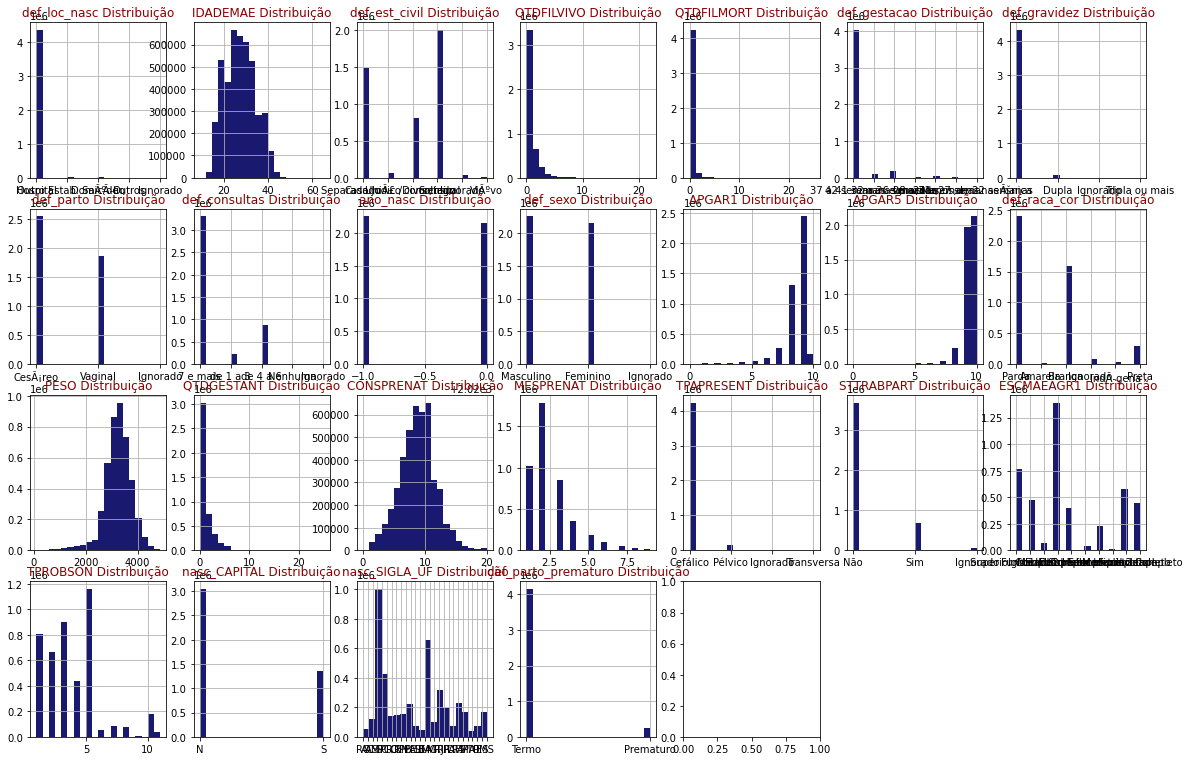

In [16]:
# Executa a função
cria_histograma(dataset, dataset.columns, 6, 7)

### Pré-Processamento

In [17]:
#!pip install imblearn

In [18]:
#!pip install tensorflow

In [19]:
#!pip install keras

In [20]:
dataset.head()

,def_loc_nasc,IDADEMAE,def_est_civil,QTDFILVIVO,QTDFILMORT,def_gestacao,def_gravidez,def_parto,def_consultas,ano_nasc,...,HDI_educ,HDI_long,HDI_inc,GeoSES,GeoSESed,GeoSESpv,GeoSESdp,GeoSESwl,GeoSESin,GeoSESsg
0,Hospital,31,Casado,1,0,37 a 41 semanas,Ãšnica,CesÃ¡reo,7 e mais,2019,...,0.600,0.806,0.716,-0.271203,61.955792,31.038901,14.750753,0.766355,2468.156796,0.078090
1,Hospital,34,Separado Judic./Divorciado,1,0,37 a 41 semanas,Ãšnica,CesÃ¡reo,7 e mais,2019,...,0.569,0.812,0.687,-0.345411,67.243633,31.840674,12.438018,0.756665,1974.867080,0.075791
2,Hospital,35,Casado,1,0,37 a 41 semanas,Ãšnica,CesÃ¡reo,7 e mais,2019,...,0.638,0.819,0.764,-0.107446,54.660565,25.279881,25.769260,1.425152,3369.488055,0.070639
3,Hospital,23,UniÃ£o consensual,4,0,37 a 41 semanas,Ãšnica,Vaginal,de 1 a 3,2019,...,0.638,0.819,0.764,-0.107446,54.660565,25.279881,25.769260,1.425152,3369.488055,0.070639
4,Hospital,27,Casado,1,0,37 a 41 semanas,Ãšnica,CesÃ¡reo,7 e mais,2019,...,0.659,0.808,0.734,-0.166268,58.343119,23.444961,21.900977,1.075079,2603.946701,0.105153


In [21]:
dataset.def_parto_prematuro = dataset.def_parto_prematuro.astype('category')

In [22]:
df_dummies = pd.get_dummies(dataset, columns=dataset.select_dtypes(include='category').columns)
df_dummies

,IDADEMAE,QTDFILVIVO,QTDFILMORT,ano_nasc,APGAR1,APGAR5,PESO,QTDGESTANT,CONSPRENAT,MESPRENAT,...,nasc_SIGLA_UF_RN,nasc_SIGLA_UF_RO,nasc_SIGLA_UF_RR,nasc_SIGLA_UF_RS,nasc_SIGLA_UF_SC,nasc_SIGLA_UF_SE,nasc_SIGLA_UF_SP,nasc_SIGLA_UF_TO,def_parto_prematuro_Prematuro,def_parto_prematuro_Termo
0,31,1,0,2019,9,10,3420,1,8,1,...,0,1,0,0,0,0,0,0,0,1
1,34,1,0,2019,10,10,3115,1,8,2,...,0,1,0,0,0,0,0,0,0,1
2,35,1,0,2019,8,9,3605,1,10,3,...,0,1,0,0,0,0,0,0,0,1
3,23,4,0,2019,9,10,3170,4,2,7,...,0,1,0,0,0,0,0,0,0,1
4,27,1,0,2019,8,9,3115,1,8,3,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4407231,29,1,1,2020,9,10,3130,2,8,2,...,0,0,0,0,0,0,0,0,0,1
4407232,33,3,0,2020,9,10,3520,3,7,3,...,0,0,0,0,0,0,0,0,0,1
4407233,30,2,0,2020,7,8,1408,2,11,2,...,0,0,0,0,0,0,0,0,1,0
4407234,21,1,1,2020,8,9,2925,2,6,3,...,0,0,0,0,0,0,0,0,0,1


In [23]:
dataset = df_dummies
dataset

,IDADEMAE,QTDFILVIVO,QTDFILMORT,ano_nasc,APGAR1,APGAR5,PESO,QTDGESTANT,CONSPRENAT,MESPRENAT,...,nasc_SIGLA_UF_RN,nasc_SIGLA_UF_RO,nasc_SIGLA_UF_RR,nasc_SIGLA_UF_RS,nasc_SIGLA_UF_SC,nasc_SIGLA_UF_SE,nasc_SIGLA_UF_SP,nasc_SIGLA_UF_TO,def_parto_prematuro_Prematuro,def_parto_prematuro_Termo
0,31,1,0,2019,9,10,3420,1,8,1,...,0,1,0,0,0,0,0,0,0,1
1,34,1,0,2019,10,10,3115,1,8,2,...,0,1,0,0,0,0,0,0,0,1
2,35,1,0,2019,8,9,3605,1,10,3,...,0,1,0,0,0,0,0,0,0,1
3,23,4,0,2019,9,10,3170,4,2,7,...,0,1,0,0,0,0,0,0,0,1
4,27,1,0,2019,8,9,3115,1,8,3,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4407231,29,1,1,2020,9,10,3130,2,8,2,...,0,0,0,0,0,0,0,0,0,1
4407232,33,3,0,2020,9,10,3520,3,7,3,...,0,0,0,0,0,0,0,0,0,1
4407233,30,2,0,2020,7,8,1408,2,11,2,...,0,0,0,0,0,0,0,0,1,0
4407234,21,1,1,2020,8,9,2925,2,6,3,...,0,0,0,0,0,0,0,0,0,1


In [24]:
dataset.mf = dataset.mf.astype(int)

In [25]:
dataset

,IDADEMAE,QTDFILVIVO,QTDFILMORT,ano_nasc,APGAR1,APGAR5,PESO,QTDGESTANT,CONSPRENAT,MESPRENAT,...,nasc_SIGLA_UF_RN,nasc_SIGLA_UF_RO,nasc_SIGLA_UF_RR,nasc_SIGLA_UF_RS,nasc_SIGLA_UF_SC,nasc_SIGLA_UF_SE,nasc_SIGLA_UF_SP,nasc_SIGLA_UF_TO,def_parto_prematuro_Prematuro,def_parto_prematuro_Termo
0,31,1,0,2019,9,10,3420,1,8,1,...,0,1,0,0,0,0,0,0,0,1
1,34,1,0,2019,10,10,3115,1,8,2,...,0,1,0,0,0,0,0,0,0,1
2,35,1,0,2019,8,9,3605,1,10,3,...,0,1,0,0,0,0,0,0,0,1
3,23,4,0,2019,9,10,3170,4,2,7,...,0,1,0,0,0,0,0,0,0,1
4,27,1,0,2019,8,9,3115,1,8,3,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4407231,29,1,1,2020,9,10,3130,2,8,2,...,0,0,0,0,0,0,0,0,0,1
4407232,33,3,0,2020,9,10,3520,3,7,3,...,0,0,0,0,0,0,0,0,0,1
4407233,30,2,0,2020,7,8,1408,2,11,2,...,0,0,0,0,0,0,0,0,1,0
4407234,21,1,1,2020,8,9,2925,2,6,3,...,0,0,0,0,0,0,0,0,0,1


In [26]:
# Verificando se a variável resposta está balanceada
target_count = dataset.mf.value_counts()
target_count

0    4371281
1      35955
Name: mf, dtype: int64

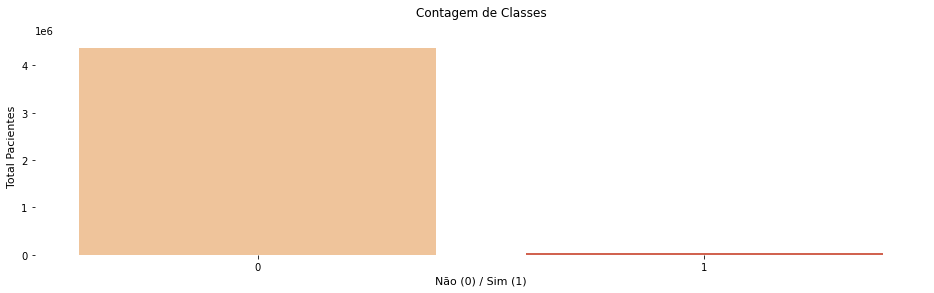

In [27]:
# Plot 
sns.countplot(dataset.mf, palette = "OrRd")
plt.box(False)
plt.xlabel('Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Pacientes', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [28]:
# Variáveis Explicativas
dataset.drop('mf', axis = 1) 

,IDADEMAE,QTDFILVIVO,QTDFILMORT,ano_nasc,APGAR1,APGAR5,PESO,QTDGESTANT,CONSPRENAT,MESPRENAT,...,nasc_SIGLA_UF_RN,nasc_SIGLA_UF_RO,nasc_SIGLA_UF_RR,nasc_SIGLA_UF_RS,nasc_SIGLA_UF_SC,nasc_SIGLA_UF_SE,nasc_SIGLA_UF_SP,nasc_SIGLA_UF_TO,def_parto_prematuro_Prematuro,def_parto_prematuro_Termo
0,31,1,0,2019,9,10,3420,1,8,1,...,0,1,0,0,0,0,0,0,0,1
1,34,1,0,2019,10,10,3115,1,8,2,...,0,1,0,0,0,0,0,0,0,1
2,35,1,0,2019,8,9,3605,1,10,3,...,0,1,0,0,0,0,0,0,0,1
3,23,4,0,2019,9,10,3170,4,2,7,...,0,1,0,0,0,0,0,0,0,1
4,27,1,0,2019,8,9,3115,1,8,3,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4407231,29,1,1,2020,9,10,3130,2,8,2,...,0,0,0,0,0,0,0,0,0,1
4407232,33,3,0,2020,9,10,3520,3,7,3,...,0,0,0,0,0,0,0,0,0,1
4407233,30,2,0,2020,7,8,1408,2,11,2,...,0,0,0,0,0,0,0,0,1,0
4407234,21,1,1,2020,8,9,2925,2,6,3,...,0,0,0,0,0,0,0,0,0,1


In [29]:
# Variável Target
dataset['mf']

0          0
1          0
2          0
3          0
4          0
          ..
4407231    0
4407232    0
4407233    0
4407234    0
4407235    0
Name: mf, Length: 4407236, dtype: int32

In [30]:
# Importa a função
# Se necessário, instale o pacote: 
# pip install imblearn
from imblearn.under_sampling import RandomUnderSampler

# Separa X e y
X = dataset.drop('mf', axis = 1)   
y = dataset['mf'] 

# Cria o balanceador:
rus = RandomUnderSampler(random_state=0)

# Aplica o balanceador
X_res, y_res = rus.fit_resample(X, y)

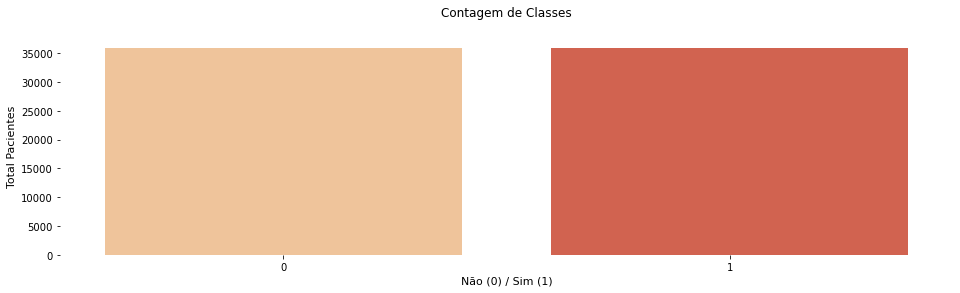

In [31]:
# Plot
sns.countplot(y_res, palette = "OrRd")
plt.box(False)
plt.xlabel('Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Pacientes', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [32]:
# Split em X e Y
X = X_res
Y = y_res

In [33]:
X.shape

(71910, 109)

In [34]:
Y.shape

(71910,)

In [35]:
# Divisão dos dados em treino e teste
from sklearn.model_selection import train_test_split

test_size = 0.1
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = test_size)

In [36]:
X_treino.shape

(64719, 109)

In [37]:
Y_treino.shape

(64719,)

In [38]:
X_teste.shape

(7191, 109)

In [39]:
Y_teste.shape

(7191,)

## Construção dos Modelos Preditivos

In [41]:
# Imports
import keras
import tensorflow
import sklearn
#import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report, matthews_corrcoef, accuracy_score
from sklearn.metrics import roc_curve, auc

In [42]:
tensorflow.__version__

'2.4.1'

In [43]:
keras.__version__

'2.4.3'

In [44]:
sklearn.__version__

'0.24.2'

#### Versão 1 - Regressão Logística

In [45]:
dataset.select_dtypes(include='object').columns

Index([], dtype='object')

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [46]:
# Cria e treina o modelo
modelo_v1 = LogisticRegression(max_iter = 600)
modelo_v1.fit(X_treino, Y_treino)

C:\Users\igor_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=600)

In [47]:
# Previsões (probabilidades)
previsoes_v1 = modelo_v1.predict_proba(X_teste)
previsoes_v1

array([[0.37905236, 0.62094764],
       [0.44123044, 0.55876956],
       [0.50694017, 0.49305983],
       ...,
       [0.49337033, 0.50662967],
       [0.49941959, 0.50058041],
       [0.77427771, 0.22572229]])

In [48]:
# Previsões (classes)
previsoes_v1 = modelo_v1.predict(X_teste)
previsoes_v1

array([1, 1, 0, ..., 1, 1, 0])

In [49]:
matriz_v1 = confusion_matrix(Y_teste, previsoes_v1)
print(matriz_v1)

[[2585 1083]
 [1408 2115]]


In [50]:
# Relatório de classificação
classe_names = ['Não (0)', 'Sim (1)']
report = classification_report(Y_teste, previsoes_v1, target_names = classe_names)
print(report)

              precision    recall  f1-score   support

     Não (0)       0.65      0.70      0.67      3668
     Sim (1)       0.66      0.60      0.63      3523

    accuracy                           0.65      7191
   macro avg       0.65      0.65      0.65      7191
weighted avg       0.65      0.65      0.65      7191



In [51]:
# Score AUC
print(roc_auc_score(Y_teste, previsoes_v1))

0.6525421741718465


In [52]:
# Extrai as taxas de verdadeiros e falsos positivos
taxa_falso_positivo, taxa_verdadeiro_positivo, thresholds = roc_curve(Y_teste, previsoes_v1)

In [53]:
taxa_falso_positivo

array([0.        , 0.29525627, 1.        ])

In [54]:
taxa_verdadeiro_positivo

array([0.        , 0.60034062, 1.        ])

In [55]:
thresholds

array([2, 1, 0])

In [56]:
# Score AUC
print(auc(taxa_falso_positivo, taxa_verdadeiro_positivo))

0.6525421741718465


In [57]:
# Score AUCROC - Caso 1
y_pred_class = modelo_v1.predict(X_teste)
print(roc_auc_score(Y_teste, y_pred_class))

0.6525421741718465


In [58]:
# Score AUCROC - Caso 2
# Por que o resultado é diferente?
y_pred_probs = modelo_v1.predict_proba(X_teste)[:,1] # Usamos [:,1] para buscar as probabilidades da classe positiva.
print(roc_auc_score(Y_teste, y_pred_probs))

0.7079628773806401


In [59]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [60]:
import scikitplot as skplt

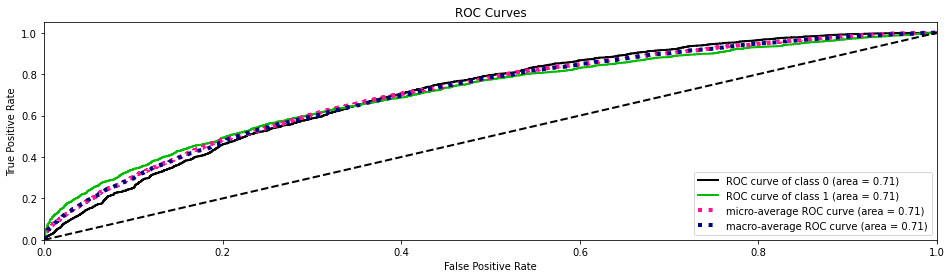

In [61]:
# Calcula a Curva ROC para cada classe
y_probs_v1 = modelo_v1.predict_proba(X_teste)
skplt.metrics.plot_roc_curve(Y_teste, y_probs_v1)
plt.show()

In [62]:
# Se as classes estiverem desbalanceadas, o ideal é usar a curva precision-recall 
from sklearn.metrics import precision_recall_curve

y_probs = modelo_v1.predict_proba(X_teste)[:,1]
precision, recall, thresholds = precision_recall_curve(Y_teste, y_probs)

In [63]:
precision

array([0.49012243, 0.49005148, 0.49011968, ..., 0.5       , 0.        ,
       1.        ])

In [64]:
recall

array([1.00000000e+00, 9.99716151e-01, 9.99716151e-01, ...,
       2.83848992e-04, 0.00000000e+00, 0.00000000e+00])

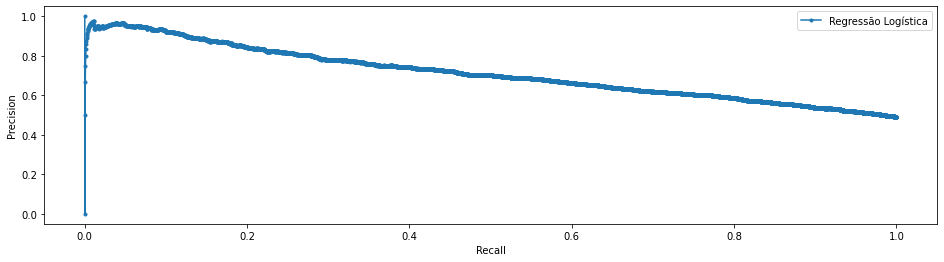

In [65]:
# Plot da curva precision-recall 
plt.plot(recall, precision, marker = '.', label = 'Regressão Logística')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

#### Versão 2 - RandomForest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [67]:
# Cria e treina o modelo
modelo_v2 = RandomForestClassifier(n_estimators = 150)
modelo_v2.fit(X_treino, Y_treino)

RandomForestClassifier(n_estimators=150)

In [68]:
# Previsões
previsoes_v2 = modelo_v2.predict(X_teste)
matriz_v2 = confusion_matrix(Y_teste, previsoes_v2)
print(matriz_v2)

[[2609 1059]
 [1271 2252]]


In [69]:
# Relatório de classificação
report = classification_report(Y_teste, previsoes_v2)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      3668
           1       0.68      0.64      0.66      3523

    accuracy                           0.68      7191
   macro avg       0.68      0.68      0.68      7191
weighted avg       0.68      0.68      0.68      7191



In [70]:
# Score AUC
print(roc_auc_score(Y_teste, previsoes_v2))

0.6752573677695505


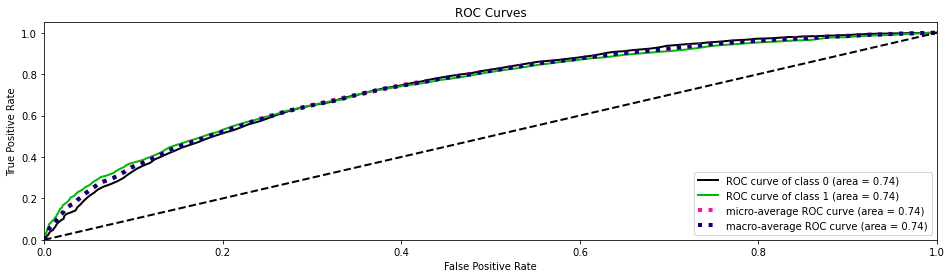

In [71]:
# Calcula a Curva ROC para cada classe
y_probs_v2 = modelo_v2.predict_proba(X_teste)
skplt.metrics.plot_roc_curve(Y_teste, y_probs_v2)
plt.show()

In [73]:
X_treino.head()

,IDADEMAE,QTDFILVIVO,QTDFILMORT,ano_nasc,APGAR1,APGAR5,PESO,QTDGESTANT,CONSPRENAT,MESPRENAT,...,nasc_SIGLA_UF_RN,nasc_SIGLA_UF_RO,nasc_SIGLA_UF_RR,nasc_SIGLA_UF_RS,nasc_SIGLA_UF_SC,nasc_SIGLA_UF_SE,nasc_SIGLA_UF_SP,nasc_SIGLA_UF_TO,def_parto_prematuro_Prematuro,def_parto_prematuro_Termo
13617,20,1,0,2019,9,9,2600,1,5,3,...,0,0,0,0,0,0,1,0,0,1
21798,26,0,0,2019,7,9,3764,0,9,2,...,1,0,0,0,0,0,0,0,0,1
11901,20,0,1,2020,9,10,3500,1,10,1,...,0,0,0,0,0,0,1,0,0,1
71473,23,1,0,2020,9,9,3320,1,8,1,...,0,0,0,0,0,0,1,0,0,1
502,25,3,1,2019,7,9,2900,4,2,6,...,0,0,0,0,0,0,0,0,0,1


#### Versão 3 - Naive Bayes

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes

In [74]:
# Cria e treina o modelo GaussianNB (variáveis quantitativas com distribuição normal)
modelo_v3 = GaussianNB()
modelo_v3.fit(X_treino, Y_treino)

# Cria e treina o modelo MultinomialNB (variáveis quantitativas discretas)
#modelo_v3 = MultinomialNB()
#modelo_v3.fit(X_treino, Y_treino)

# Cria e treina o modelo BernoulliNB (variáveis quantitativas discretas)
#modelo_v3 = BernoulliNB()
#modelo_v3.fit(X_treino, Y_treino)

GaussianNB()

In [75]:
# Previsões
previsoes_v3 = modelo_v3.predict(X_teste)
matriz_v3 = confusion_matrix(Y_teste, previsoes_v3)
print(matriz_v3)

[[3179  489]
 [2254 1269]]


In [76]:
# Relatório de classificação
report = classification_report(Y_teste, previsoes_v3)
print(report)

              precision    recall  f1-score   support

           0       0.59      0.87      0.70      3668
           1       0.72      0.36      0.48      3523

    accuracy                           0.62      7191
   macro avg       0.65      0.61      0.59      7191
weighted avg       0.65      0.62      0.59      7191



In [77]:
# Score AUC
print(roc_auc_score(Y_teste, previsoes_v3))

0.6134446065750818


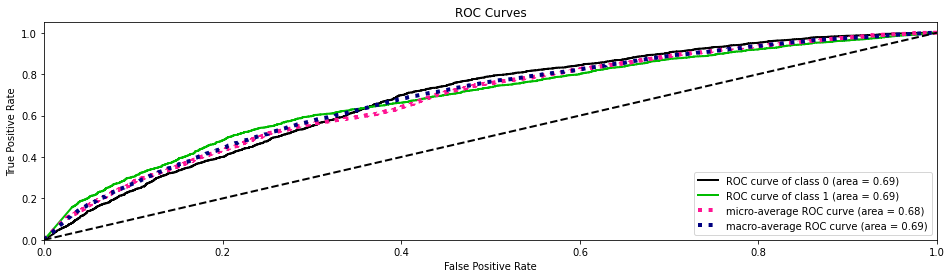

In [78]:
# Calcula a Curva ROC para cada classe
y_probs_v3 = modelo_v3.predict_proba(X_teste)
skplt.metrics.plot_roc_curve(Y_teste, y_probs_v3)
plt.show()

In [79]:
# Coeficiente de Correlação Matthews
print(matthews_corrcoef(Y_teste, previsoes_v3))

0.263909817395049


#### Versão 4 - KNN

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [80]:
# Cria e treina o modelo
modelo_v4 = KNeighborsClassifier()
modelo_v4.fit(X_treino, Y_treino)

KNeighborsClassifier()

In [81]:
# Previsões
previsoes_v4 = modelo_v4.predict(X_teste)
matriz_v4 = confusion_matrix(Y_teste, previsoes_v4)
print(matriz_v4)

[[2239 1429]
 [1436 2087]]


In [82]:
# Relatório de classificação
report = classification_report(Y_teste, previsoes_v4)
print(report)

              precision    recall  f1-score   support

           0       0.61      0.61      0.61      3668
           1       0.59      0.59      0.59      3523

    accuracy                           0.60      7191
   macro avg       0.60      0.60      0.60      7191
weighted avg       0.60      0.60      0.60      7191



In [83]:
# Score AUC
print(roc_auc_score(Y_teste, previsoes_v4))

0.6014036208854665


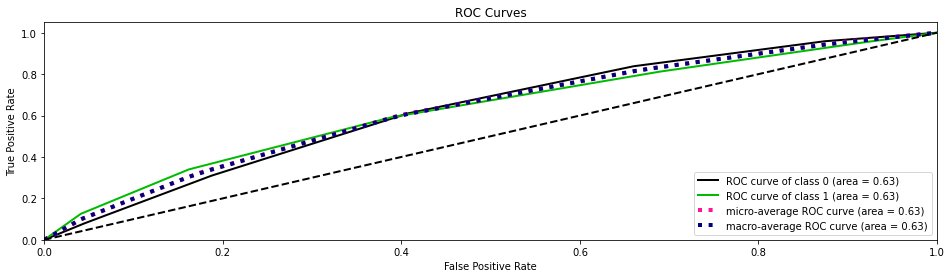

In [84]:
# Calcula a Curva ROC para cada classe
y_probs_v4 = modelo_v4.predict_proba(X_teste)
skplt.metrics.plot_roc_curve(Y_teste, y_probs_v4)
plt.show()

In [85]:
# Coeficiente de Correlação Matthews
print(matthews_corrcoef(Y_teste, previsoes_v4))

0.20281559164529553


### Validação Cruzada

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

Uma vez que terminamos de treinar nosso modelo, não podemos assumir que ele funcionará bem em dados que ainda não foram vistos. Em outras palavras, não podemos ter certeza de que o modelo terá a precisão e a variação desejadas no ambiente de produção. 

Precisamos de algum tipo de garantia da precisão das previsões que nosso modelo está divulgando. Para isso, precisamos validar nosso modelo. Esse processo, de decidir se os resultados numéricos que quantificam as relações entre variáveis ​​são aceitáveis​​ como descrições dos dados, é conhecido como validação.

A Validação Cruzada (CV - Cross Validation) é uma das técnicas usadas para testar a eficácia de modelos de aprendizado de máquina; também é um procedimento de re-amostragem usado para avaliar um modelo se tivermos dados limitados. Para executar o CV, fazemos divisões sucessivas nos dados, separando em treino e teste, mas fazendo com o que o algoritmo passe por todo conjunto de dados. As duas abordagens principais são:

- Train_Test Split approach
- K-Folds Cross Validation

<img src="imagens/kfolds.png" alt="Drawing"/>

#### Como Funciona o K-Fold:

1- Dividimos os dados inteiros aleatoriamente em K-folds (o valor de k não deve ser muito pequeno ou muito alto; idealmente, escolhemos de 5 a 10, dependendo do tamanho dos dados). O valor mais alto de K leva a um modelo menos tendencioso (mas uma grande variância pode levar a um super ajuste), onde o valor mais baixo de K é semelhante à abordagem de divisão de teste e treino que vimos anteriormente.

2- Em seguida, ajustamos o modelo usando os K-folds - 1 (K menos 1) e validamos o modelo usando a Kth fold restante. Gravamos as métriicas / erros.

3- Repitimos esse processo até que cada K-fold sirva como conjunto de teste. Em seguida, calculamos a média das métricas gravadas. Essa será a métrica de desempenho final para o modelo.

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [86]:
# Função para imprimir o resultado da validação cruzada

# Ao realizar a validação cruzada, podemos usar todos os nossos dados, tanto para treinamento quanto para teste, 
# enquanto avaliamos nosso algoritmo de aprendizado em exemplos nunca antes vistos.

# Observe que estamos usando X e Y

# Função para validação cruzada com duas métricas
def validacao_cruzada(modelo) :
    cv_results = cross_validate(modelo, X, Y, scoring = ['accuracy', 'roc_auc'], cv = 5)

    print('\nAcurácia em Teste:', float(format(np.mean(cv_results['test_accuracy']), '.3f')))
    print('AUC em Teste:', float(format(np.mean(cv_results['test_roc_auc']), '.3f')))
    print()

In [87]:
%%time
modelos = [LogisticRegression(max_iter = 4000), 
           RandomForestClassifier(n_estimators = 150), 
           GaussianNB(), 
           KNeighborsClassifier()]

for modelo in modelos:
    print("\nModelo e Parâmetros:", modelo)
    validacao_cruzada(modelo)


Modelo e Parâmetros: LogisticRegression(max_iter=4000)

Acurácia em Teste: 0.593
AUC em Teste: 0.629


Modelo e Parâmetros: RandomForestClassifier(n_estimators=150)

Acurácia em Teste: 0.486
AUC em Teste: 0.418


Modelo e Parâmetros: GaussianNB()

Acurácia em Teste: 0.564
AUC em Teste: 0.576


Modelo e Parâmetros: KNeighborsClassifier()

Acurácia em Teste: 0.56
AUC em Teste: 0.576

Wall time: 8min 54s


### Otimização de Hiperparâmetros

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Um hiperparâmetro é um parâmetro cujo valor é definido antes do início do processo de aprendizado.

Alguns exemplos de hiperparâmetros incluem penalidade na regressão logística e perda na descida do gradiente estocástico. No sklearn, os hiperparâmetros são passados como argumentos para o construtor das classes de modelo.

Principais Estratégias de Otimização de Hiperparâmetros:

- Pesquisa em grade (Grid Search)
- Pesquisa aleatória (Random Search)


In [88]:
# Imports
import pandas as pd
import numpy as np

# Função para o Grid Search
from sklearn.model_selection import GridSearchCV

# Classe para a otimização de hiperparâmetros
class OtimizaHiperparametros:

    # Construtor da classe
    def __init__(self, models, params):
        
        # Verfica se algum modelo não tem hiperparâmetros para otimização
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Alguns estimadores estão com parâmetros ausentes: %s" % missing_params)
            
        # Inicia os atributos da classe
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    # Método para executar o Grid Search
    def fit(self, X, y, cv = 3, n_jobs = 3, verbose = 1, scoring = None, refit = False):
        
        # Loop por cada modelo (chave)
        for key in self.keys:
            print("\nExecutando GridSearchCV Para o Modelo %s:" % key)
            model = self.models[key]
            params = self.params[key]
            
            # Cria o objeto Grid Search para cada modelo
            gs = GridSearchCV(model, 
                              params, 
                              cv = cv, 
                              n_jobs = n_jobs, 
                              verbose = verbose, 
                              scoring = scoring, 
                              refit = refit, 
                              return_train_score = True)
            
            # Executa o Grid Search 
            gs.fit(X,y)
            
            # Salva o nome do modelo que foi processado
            self.grid_searches[key] = gs    

    # Método para calcular o score (métrica final)
    def score_summary(self, sort_by = 'mean_score'):
        
        # Função para criar uma linha com cada resultado do Grid Search
        def row(key, scores, params):
            d = {
                 'modelo': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        
        # Para cada resultado, retorna o resultadoo formatado
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            # Junta tudo em uma única estrutura
            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        # Gera cada coluna
        columns = ['modelo', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [89]:
# Lista dos modelos para otimização
lista_modelos = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier()
}

lista_modelos

{'LogisticRegression': LogisticRegression(),
 'RandomForestClassifier': RandomForestClassifier(),
 'KNeighborsClassifier': KNeighborsClassifier()}

In [90]:
# Grid de parâmetros que serão testados
grid_parametros = {
    'LogisticRegression': { 'max_iter': [4000, 5000, 8000, 10000] },
    'RandomForestClassifier': { 'n_estimators': [175, 200, 225, 250] },
    'KNeighborsClassifier': { 'n_neighbors': [4, 5, 6, 7], 'metric': ['minkowski'], 'p': [1, 2, 3] }
}

grid_parametros

{'LogisticRegression': {'max_iter': [4000, 5000, 8000, 10000]},
 'RandomForestClassifier': {'n_estimators': [175, 200, 225, 250]},
 'KNeighborsClassifier': {'n_neighbors': [4, 5, 6, 7],
  'metric': ['minkowski'],
  'p': [1, 2, 3]}}

In [91]:
# Cria o otimizador de parâmetros (instância da classe)
otimizador_parametros = OtimizaHiperparametros(lista_modelos, grid_parametros)

In [ ]:
%%time

# Executa o otimizador
otimizador_parametros.fit(X_treino, Y_treino, scoring = 'roc_auc', n_jobs = 2)


Executando GridSearchCV Para o Modelo LogisticRegression:
Fitting 3 folds for each of 4 candidates, totalling 12 fits

Executando GridSearchCV Para o Modelo RandomForestClassifier:
Fitting 3 folds for each of 4 candidates, totalling 12 fits

Executando GridSearchCV Para o Modelo KNeighborsClassifier:
Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [ ]:
# Sumário da otimização
otimizador_parametros.score_summary(sort_by = 'max_score')

#### Versão 5 - Deep Learning

https://keras.io/

<img src="imagens/deep.png" alt="Drawing"/>

In [ ]:
X_treino.shape

In [ ]:
# Construção do modelo com Keras
# Definimos diversas camadas e aplicamos regularização com dropout para evitar o overfitting
# http://papers.nips.cc/paper/4878-understanding-dropout.pdf
modelo_v5 = Sequential()
modelo_v5.add(Dense(256, input_dim = 12, activation = 'relu'))
modelo_v5.add(Dropout(0.5))
modelo_v5.add(Dense(256, activation = 'relu'))
modelo_v5.add(Dropout(0.5))
modelo_v5.add(Dense(1, activation = 'sigmoid'))
modelo_v5.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
%%time

# Treinamos o modelo
history = modelo_v5.fit(X_treino, Y_treino, epochs = 100, batch_size = 128, verbose = 1, validation_split = 0.1)

In [ ]:
# Sumário do modelo
modelo_v5.summary()

In [ ]:
# Sumário da Acurácia
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Validação'], loc = 'upper left')
plt.show()

# Loss
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Erro do Modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Validação'], loc = 'upper left')
plt.show()

In [ ]:
# Previsões
previsoes_v5 = modelo_v5.predict_classes(X_teste)
matriz_v5 = confusion_matrix(Y_teste, previsoes_v5)
print(matriz_v5)

In [ ]:
# Relatório de Classificação
report = classification_report(Y_teste, previsoes_v5)
print(report)

In [ ]:
# Score AUC
print(roc_auc_score(Y_teste, previsoes_v5))

In [ ]:
# Plot das métricas
import scikitplot as skplt
import matplotlib.pyplot as plt
f, (ax1) = plt.subplots(1)

# Calcula a Curva ROC para cada classe
y_probs_v5 = modelo_v5.predict_proba(X_teste)

# Precisamos usar esse procedimento pois o Keras apresenta apenas a probabilidade da classe prevista
skplt.metrics.plot_roc(Y_teste, np.concatenate((1 - y_probs_v5, y_probs_v5), axis = 1), ax = ax1)
plt.show()

In [ ]:
# Coeficiente de Correlação de Matthews
print(matthews_corrcoef(Y_teste, previsoes_v5))

### Comparando os Modelos

In [ ]:
# Comparando o Score AUC dos modelos

# Cria lista vazia
lista_auc = []

# Calcula o Score AUC para cada modelo
auc_modelo_v1 = roc_auc_score(Y_teste, previsoes_v1)
auc_modelo_v2 = roc_auc_score(Y_teste, previsoes_v2)
auc_modelo_v3 = roc_auc_score(Y_teste, previsoes_v3)
auc_modelo_v4 = roc_auc_score(Y_teste, previsoes_v4)
auc_modelo_v5 = roc_auc_score(Y_teste, previsoes_v5)

# Junta os resultados em uma lista
lista_auc = [auc_modelo_v1, auc_modelo_v2, auc_modelo_v3, auc_modelo_v4, auc_modelo_v5]

In [ ]:
# Comparando o Coeficiente de Correlação de Matthews dos modelos

# Cria lista vazia
lista_mcorr = []

# Calcula o Coeficiente para cada modelo
mcorr_v1 = matthews_corrcoef(Y_teste, previsoes_v1)
mcorr_v2 = matthews_corrcoef(Y_teste, previsoes_v2)
mcorr_v3 = matthews_corrcoef(Y_teste, previsoes_v3)
mcorr_v4 = matthews_corrcoef(Y_teste, previsoes_v4)
mcorr_v5 = matthews_corrcoef(Y_teste, previsoes_v5)

# Junta os resultados em uma lista
lista_mcorr = [mcorr_v1, mcorr_v2, mcorr_v3, mcorr_v4, mcorr_v5]

In [ ]:
# Comparando a Acurácia dos modelos

# Cria lista vazia
lista_acc = []

# Calcula a Acurácia para cada modelo
acc_modelo_v1 = accuracy_score(Y_teste, previsoes_v1)
acc_modelo_v2 = accuracy_score(Y_teste, previsoes_v2)
acc_modelo_v3 = accuracy_score(Y_teste, previsoes_v3)
acc_modelo_v4 = accuracy_score(Y_teste, previsoes_v4)
acc_modelo_v5 = accuracy_score(Y_teste, previsoes_v5)

# Junta os resultados em uma lista
lista_acc = [acc_modelo_v1, acc_modelo_v2, acc_modelo_v3, acc_modelo_v4, acc_modelo_v5]

In [ ]:
# Concatena as 3 listas de métricas em uma única tabela
lista_metricas = pd.DataFrame(np.column_stack([lista_auc, lista_mcorr, lista_acc]), 
                              columns = ['AUC', 'Matthews', 'Acurácia'])

# Adiciona uma coluna com os nomes dos modelos
lista_metricas['Modelo'] = ['Regressão Logística', 'RandomForest', 'Naive Bayes', 'KNN', 'Deep Learning']

In [ ]:
# Lista as métricas por ordem decrescente do Score AUC
lista_metricas.sort_values(by ='AUC', ascending = False)

### Preparando a Versão Final do Modelo

In [ ]:
# Cria e treina o modelo
modelo_final_rf = RandomForestClassifier(n_estimators = 200)
modelo_final_rf.fit(X_treino, Y_treino)

In [ ]:
# Salvando o modelo
import pickle
filename = 'modelos/modelo_final.sav'
pickle.dump(modelo_final_rf, open(filename, 'wb'))

In [ ]:
# Carregando o Modelo
classificador_pacientes = pickle.load(open(filename, 'rb'))

In [ ]:
classificador_pacientes

### Deploy do Modelo

O deploy de um modelo de Machine Learning consiste em entregar os resultados do modelo. Isso pode ser feito manualmente, de forma automatizada, via aplicação web, gerando arquivos csv com as previsões todos os dias à noite e então aliimentando um Dashboard, etc.... Em geral esse trabalho envolve um Engenheiro de Machine Learning e equpes de desenvolvimento.

In [ ]:
# Os novos dados devem estar no mesmo formato usado nos dados de teste
X_teste.head()

In [ ]:
X_teste.shape

In [ ]:
# Dados de um novo paciente
novo_paciente = np.array([54,1,0,1,0,1,0,0,0,0,0,0])
print(novo_paciente.shape)
print(novo_paciente)

In [ ]:
# Ajustando o shape dos dados para o modelo
novo_paciente_reshaped = novo_paciente.reshape(1, -1)
print(novo_paciente_reshaped.shape)
print(novo_paciente_reshaped)

In [ ]:
# Fazendo a previsão
print("\nO paciente será readmitido na clínica em até 30 dias após a alta?")
previsao = classificador_pacientes.predict(novo_paciente_reshaped)
if previsao == 0:
      print("\nNão, o paciente não deve ser readmitido na clínica em até 30 dias após a alta.")
else:
      print("\nSim, o paciente deve ser readmitido na clínica em até 30 dias após a alta.")

# Fim